# PyTorch Workflow

Esplorazione di un esempio di PyTorch end-to-end workflow

![workflow](image/01_a_pytorch_workflow.png)


| Topic	| Contents|
|-------|---------|
| 1. Getting data ready | Data can be almost anything but to get started we're going to create a simple straight line| 
| 2. Building a model | Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.| 
| 3. Fitting the model to data (training) | We've got data and a model, now let's let the model (try to) find patterns in the (training) data.| 
| 4. Making predictions and evaluating a model (inference) | Our model's found patterns in the data, let's compare its findings to the actual (testing) data.| 
| 5. Saving and loading a model | You may want to use your model elsewhere, or come back to it later, here we'll cover that.| 
| 6. Putting it all together | Let's take all of the above and combine it.| 

In [17]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check pytorch version

torch.__version__

'2.7.0'

## 1. Data (Prep and loading)

Nel machine learning i dati possono essere quasi qualsiasi cosa:
* Tabelle excel
* Immagini di ogni tipo
* Video
* Audio
* DNA
* Testo

Il Machine Learning è un gioco composto da due parti:
1. Portare i dati in una forma numerica
2. Costruire un modello che impara pattern da queste rappresentazioni numeriche.

![ML](image/01-machine-learning-a-game-of-two-parts.png)

Useremo la regressione lineare per creare dei dati
$Y_{i}=f(X_i, \beta)+e_i$

* $Y_{i}$ è la variabile dipendente
* $f$ è la funzione
* $X_i$ è la variabile indipendente
* $\beta$ sono i parametri sconosciuti
* $e_i$ errori

Una regressione lineare ha la formula $$Y=a+bX$$ dove $X$ è la va vaiabile indipendente e $Y$ qyella dipendente.
$b$ è la slope (pendenza) e $a$ è la sua intercetta (il valore di $y$ quando $x=0$)

**Useremo la formula della regressione lineare per costurire una linea retta con dei **parametri** _conosciuti_

In [18]:
# Create *Known* Parameters

weight = 0.7 # weigth = b in te formula
bias = 0.3 # bias = a in the formula

# Create

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1) # trasforma il tensore da 1D shape [50] a 2D shape [50,1](diventa una matrice a una sola colonna)
y = weight * X + bias

X[:10], Y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [19]:
len(X), len(y)

(50, 50)

## 1. Splitting data into training and test sets

![3 sets](image/3_sets.png)

| Split | Purpose |	Amount of total data | How often is it used? |
|-------|---------|----------------------|-----------------------|
| **Training set** | The model learns from this data (like the course materials you study during the semester). | ~60-80% | Always |
| **Validation set** | The model gets tuned on this data (like the practice exam you take before the final exam). | ~10-20% | Often but not always |
| **Testing set** | The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester). | ~10-20% | Always |

In [20]:
# Create a train/test split
train_split= int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### Visualize, visualize, visualize

In [37]:
def plot_predictions(train_data=X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions=None):
    """
    Plots training data, test data and compares predictions.
    """

    plt.figure(figsize=(10,7))

    plt.scatter(train_data,train_labels, c="b", s=4, label="Training Data")

    plt.scatter(test_data,test_labels, c="g", s=4, label="Testing Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    plt.legend(prop={"size":14})

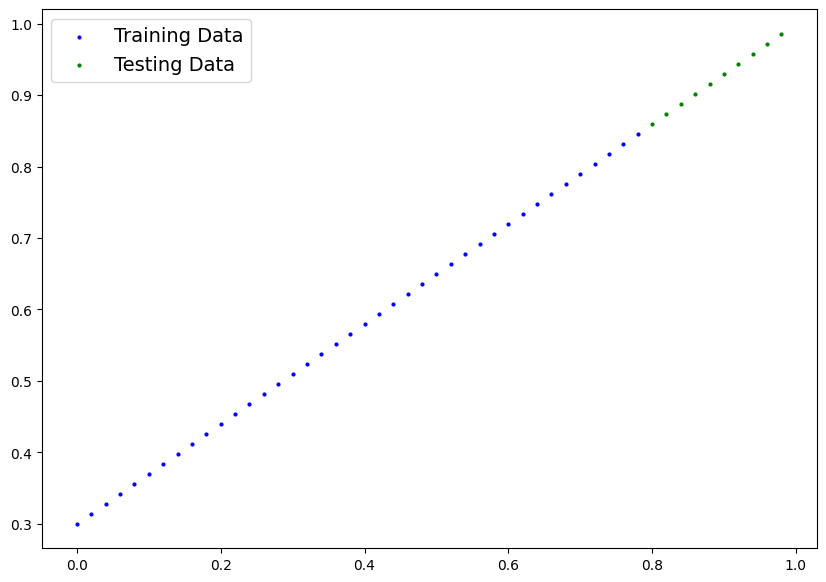

In [38]:
plot_predictions()

## 2 Build model
* Iniziamo con valori randomici (weight & bias)
* Guarderà ai nostri training data e aggiusterà i valori randomici per rappresentare meglio i valori ideali (wight & bias usati per crear ei dati)

Questa avverrà attraverso due algoritmi principali:

* **Gradient descend** (calcolo loss, calcolo dei delle derivate parziali rispetto la losso per il gradiente)
* **Backpropagation** ( I valori verranno passati all'indietro per sistemare i nuovi pesi, per determinare quanto ogni peso contribuisce all'errore)

In [40]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

PyTorch ha **4 moduli essenziali**.

Sono `torch.nn`, `torch.optim`, `torch.utils.data.Dataset` e `torch.utils.data.DataLoader`. 

| `PyTorch module` | What does it do?|
|------------------|------------------|
| `torch.nn` |	Contiene tutti gli elementi costitutivi dei grafici computazionali (essenzialmente una serie di calcoli eseguiti in un modo particolare).|
| `torch.nn.Parameter`	 | Memorizza i tensori che possono essere utilizzati con `nn.Module`. Se `requires_grad=True`, i gradienti (utilizzati per aggiornare i parametri del modello tramite la discesa del gradiente) vengono calcolati automaticamente, questo viene spesso definito "autograd".|
| `torch.nn.Module` | 	La classe base per tutti i moduli di rete neurale, tutti i componenti fondamentali per le reti neurali sono sottoclassi. Se stai costruendo una rete neurale in PyTorch, i tuoi modelli dovrebbero essere sottoclassi di `nn.Module`. Richiede l'implementazione di un metodo `forward()`.|
| `torch.optim`	 | Contiene vari algoritmi di ottimizzazione (che indicano ai parametri del modello memorizzati in `nn.Parameter` come apportare le modifiche migliori per migliorare la discesa del gradiente e, di conseguenza, ridurre la perdita).|
| `def forward()`	 | Tutte le sottoclassi di `nn.Module` richiedono un metodo `forward()`, che definisce il calcolo che verrà eseguito sui dati passati al particolare nn.Module (ad esempio la formula di regressione lineare di cui sopra). |


Quasi ogni cosa in una rete neurale con PyTorch viene da `torch.nn`,

* `nn.Module` contains the larger building blocks (layers)
* `nn.Parameter` contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
* `forward()` tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
* `torch.optim` contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data

![](image/01-pytorch-linear-model-annotated.png)

### Checking the content of out PyTotch Model

`.parameters()`

In [41]:
# Create a random seed

torch.manual_seed(42)

# Create an istance of the model
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [42]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [43]:
weight, bias

(0.7, 0.3)

Il nostro goal è fare in modo che i valori siano il più vicini possibile a quelli da noi creati (che nella realtà non sono cosciuti)

## Making prediction using `torch.inference_mode()`

Per controllare il potere di predizione, veidamo quanto bene predice `y_test` basandosi su `X_test`
Quando passiamo dei dati al nostro modello, lui girerà attraverso il metodo `forward()`

In [44]:
# Make prediction with model

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

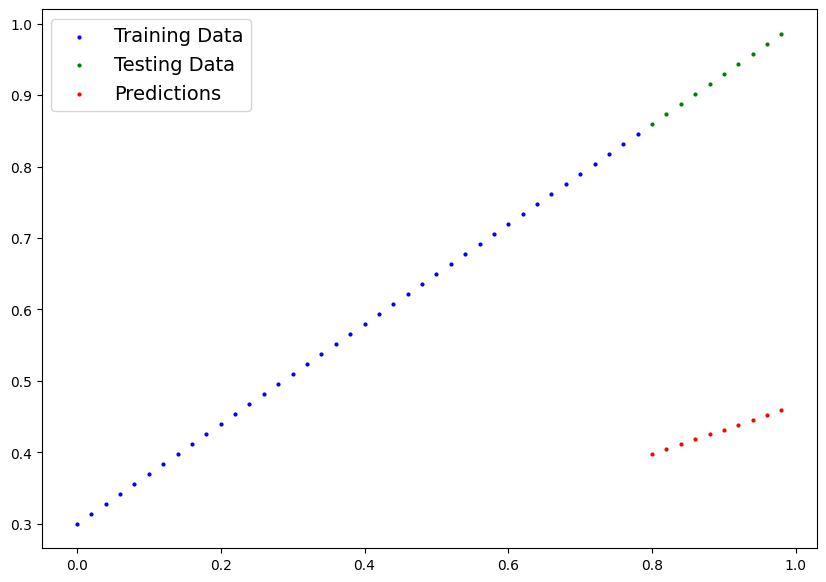

In [39]:
plot_predictions(predictions=y_preds)

### 3 Train model
L'intera idea di training per un modello è muoversi da *unknown* parameters (random) a *know* parameters.
Ovvero da una rappresentazione *scarsa* (i punti rossi) a una più accurata.

Un modo per misurare quanto male un modello predice i valori è usare la **loss function**

Una loss function può essere anche chiamata cost function o criterion function.

**Optimizer** prende la loss di un modello e aggiusta i parametri del modello per migliorare la loss function.

In PyTorch abbiamo bisogno:
- Un training loop
- Un test loop